# <font color='green'>Homework 1</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2023<br>
Course: Machine Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

# <span style="color:purple">Question 7</span>

In [12]:
circle_x = 1.5
circle_y = 0
circle1_r1 = 4
circle1_r2 = 9
circle2_r = 6
circle_r1 = 2
circle_r2 = 6
num_of_points1 = 200
num_of_points2 = 100

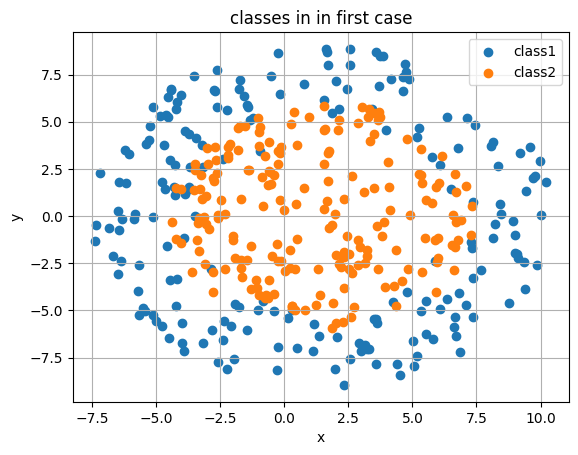

In [13]:
_1_class1_x = []
_1_class1_y = []
_1_class2_x = []
_1_class2_y = []
for i in range(num_of_points1):
    alpha = 2 * math.pi * random.random()
    r = (circle1_r2 - circle1_r1) * math.sqrt(random.random()) + circle1_r1
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    _1_class1_x.append(x)
    _1_class1_y.append(y)
    r = (circle2_r) * math.sqrt(random.random())
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    _1_class2_x.append(x)
    _1_class2_y.append(y)

plt.title('classes in in first case')
plt.scatter(_1_class1_x, _1_class1_y, label='class1')
plt.scatter(_1_class2_x, _1_class2_y, label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Final samples stats x in class1: mean = 1.0000 stdv = 1.0000
Final samples stats y in class2: mean = 0.0000 stdv = 1.0000


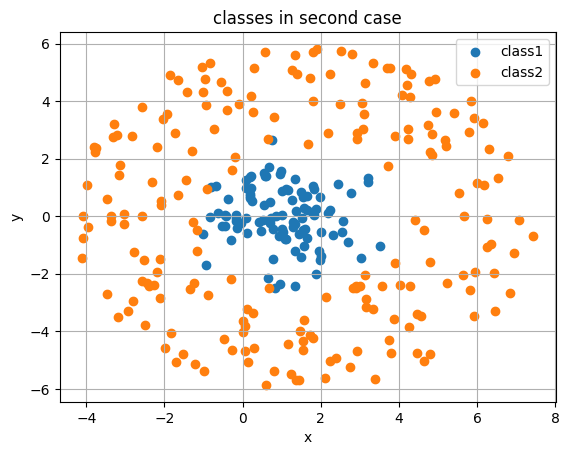

In [14]:
_2_class2_x = []
_2_class2_y = []
desired_mean_x = 1.0
desired_mean_y = 0.0
desired_std_dev = 1.0

samples_x = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_of_points2)
samples_y = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_of_points2)

actual_mean_x = np.mean(samples_x)
actual_std_x = np.std(samples_x)
actual_mean_y = np.mean(samples_y)
actual_std_y = np.std(samples_y)

zero_mean_samples_x = samples_x - (actual_mean_x)
zero_mean_samples_y = samples_y - (actual_mean_y)

zero_mean_mean_x = np.mean(zero_mean_samples_x)
zero_mean_mean_y = np.mean(zero_mean_samples_y)
zero_mean_std_x = np.std(zero_mean_samples_x)
zero_mean_std_y = np.std(zero_mean_samples_y)

scaled_samples_x = zero_mean_samples_x * (desired_std_dev/zero_mean_std_x)
scaled_samples_y = zero_mean_samples_y * (desired_std_dev/zero_mean_std_y)
scaled_mean_x = np.mean(scaled_samples_x)
scaled_mean_y = np.mean(scaled_samples_y)
scaled_std_x = np.std(scaled_samples_x)
scaled_std_y = np.std(scaled_samples_y)

_2_class1_x = scaled_samples_x + desired_mean_x
_2_class1_y = scaled_samples_y + desired_mean_y
final_mean_x = np.mean(_2_class1_x)
final_std_x = np.std(_2_class1_x)
final_mean_y = np.mean(_2_class1_y)
final_std_y = np.std(_2_class1_y)
print("Final samples stats x in class1: mean = {:.4f} stdv = {:.4f}".format(final_mean_x, final_std_x))
print("Final samples stats y in class2: mean = {:.4f} stdv = {:.4f}".format(final_mean_y, final_std_y))

for i in range(num_of_points1):
    alpha = 2 * math.pi * random.random()
    r = (circle_r2 - circle_r1) * math.sqrt(random.random()) + circle_r1
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    _2_class2_x.append(x)
    _2_class2_y.append(y)

plt.title('classes in second case')
plt.scatter(_2_class1_x, _2_class1_y, label='class1')
plt.scatter(_2_class2_x, _2_class2_y, label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [112]:
def sigmoid(z):
    if z < 0:
        return (np.exp(z)/(1+np.exp(z)))
    return (1/(1+np.exp(-z)))

In [152]:
def logloss(y_actual, y_pred):
    if y_pred == 0 or y_pred == 1:
        return -1e4
    y_actual = np.array(y_actual)
    y_pred = np.array(y_pred)
    log_loss = -1 * np.mean(y_actual*np.log10(y_pred) + (1-y_actual)*np.log10(1-y_pred))
    return log_loss

In [66]:
def gradient_dw(x, y, w, b, alpha, N):
    dw= x*(y-sigmoid(np.dot(w.T, x)+b)) - ((alpha*w*w)/N)
    return dw

In [67]:
def gradient_db(x, y, w, b):
    db= y-sigmoid(np.dot(w.T, x)+b)
    return db

In [71]:
_1_classes_x = _1_class1_x + _1_class2_x
_1_classes_y = _1_class1_y + _1_class2_y
labels = [0]*num_of_points1 + [1]*num_of_points1
X = np.array(list(zip(_1_classes_x, _1_classes_y)))

raw_data = {'x1': _1_classes_x,
            'x2': _1_classes_y,
            'label': labels,
           }
df = pd.DataFrame(raw_data, columns=['x1', 'x2', 'label'])

mask = np.random.rand(len(df)) < 0.7

train_x1 = (df['x1'])[mask]
train_x2 = (df['x2'])[mask]
train_label = (df['label'])[mask]
test_x1 = (df['x1'])[~mask]
test_x2 = (df['x2'])[~mask]
test_label = (df['label'])[~mask]

print(df)

           x1        x2  label
0   -1.713148  7.211347      0
1    5.182642 -7.417329      0
2    2.051467 -6.389211      0
3    3.982021  4.558758      0
4    0.500962 -7.014846      0
..        ...       ...    ...
395  3.501742  1.466500      1
396 -1.419629  2.433179      1
397  0.321655 -4.858411      1
398 -2.951102 -0.661819      1
399  2.332719 -2.190337      1

[400 rows x 3 columns]


In [162]:
w1 = np.zeros(2)
b1 = 0

w2 = np.zeros(35)
b2 = 0

etha = 0.0001
alpha = 0.0001

N = len(train_label)
epochs = 50

for i in range(0, epochs):
    log_loss_train1 = []
    log_loss_test1 = []
        
    for (x1, x2, label) in zip(train_x1, train_x2, train_label):
        
        grad_w1 = gradient_dw(np.array([x1, x2]), label, w1, b1, alpha, N)
        grad_b1 = gradient_db(np.array([x1, x2]), label, w1, b1)
        
        w1 = np.array(w1) + (etha*np.array(grad_w1))
        b1 = b1 + (etha * grad_b1)
        
    predict_train1 = []
    for (x1, x2, label) in zip(train_x1, train_x2, train_label):
        z = np.dot(w1, np.array([x1, x2]))+b1
        predict_train1.append(sigmoid(z))
        
    train_loss1 = logloss(train_label, predict_train1)
    
    predict_test1 = []
    for (x1, x2, label) in zip(test_x1, test_x2, test_label):
        z = np.dot(w1, np.array([x1, x2]))+b1
        predict_test1.append(sigmoid(z))
        
    test_loss1 = logloss(test_label, predict_test1)
    
    if log_loss_train1 and train_loss1 > log_loss_train1[-1]:
        break
        
    log_loss_train1.append(train_loss1)
    log_loss_test1.append(test_loss1)
    
# R2 -> R35
for i in range(0, epochs):
        
    log_loss_train2 = []
    log_loss_test2 = []
        
        
    for (x1, x2, label) in zip(train_x1, train_x2, train_label):
        
        X = []
        for i in range(1, 8):
            for j in range(0, i+1):
                X.append((x1**(i))*(x2**(i-j))/100)
        
        grad_w2 = gradient_dw(np.array(X), label, w2, b2, alpha, N)
        grad_b2 = gradient_db(np.array(X), label, w2, b2)
        
        w2 = np.array(w2) + (etha*np.array(grad_w2))
        b2 = b2 + (etha * grad_b2)
    
    predict_train2 = []
    for (x1, x2, label) in zip(train_x1, train_x2, train_label):
        X = []
        for i in range(1, 8):
            for j in range(0, i+1):
                X.append((x1**(i))*(x2**(i-j)))
                
        z = np.dot(w2, np.array(X))+b2
        predict_train2.append(sigmoid(z))
    
    train_loss2 = logloss(train_label, predict_train2)
    
    predict_test2 = []
    for (x1, x2, label) in zip(test_x1, test_x2, test_label):
        X = []
        for i in range(1, 8):
            for j in range(0, i+1):
                X.append((x1**(i))*(x2**(i-j)))
                
        z = np.dot(w2, np.array(X))+b2
        predict_test2.append(sigmoid(z))
       
    test_loss2 = logloss(test_label, predict_test2)
    
    if log_loss_train2 and train_loss2 > log_loss_train2[-1]:
        break
        
    log_loss_train2.append(train_loss2)
    log_loss_test2.append(test_loss2)
    

C:\Users\fatasystem\AppData\Local\Temp\ipykernel_3092\814811169.py:6: RuntimeWarning: divide by zero encountered in log10
  log_loss = -1 * np.mean(y_actual*np.log10(y_pred) + (1-y_actual)*np.log10(1-y_pred))
C:\Users\fatasystem\AppData\Local\Temp\ipykernel_3092\814811169.py:6: RuntimeWarning: invalid value encountered in multiply
  log_loss = -1 * np.mean(y_actual*np.log10(y_pred) + (1-y_actual)*np.log10(1-y_pred))


In [163]:
log_loss_train2

[nan]

In [164]:
w2

array([-5.45488058e-03,  1.42209765e-02, -2.46281311e-01, -1.99820518e-02,
        1.85724842e-02, -1.61608991e+00,  3.09620564e+00, -1.59189879e-01,
        3.39873781e-01, -3.61671559e+02, -8.99189954e+00, -6.33023122e+00,
       -5.36850325e-01,  2.55009151e-02, -1.11028804e+03,  8.63247294e+02,
       -7.09764177e+01,  6.65139661e+01, -7.86790206e+00,  8.06738993e+00,
       -4.19444289e+05, -6.18010344e+03, -9.28184202e+03, -4.35884752e+02,
       -2.23877371e+02, -2.94080698e+01, -2.87168681e+01, -1.23676974e+04,
       -1.35050401e+05, -4.30984185e+04,  6.34366433e+03, -4.89253562e+03,
        9.91007353e+02, -4.90879852e+02,  4.80820305e+01])

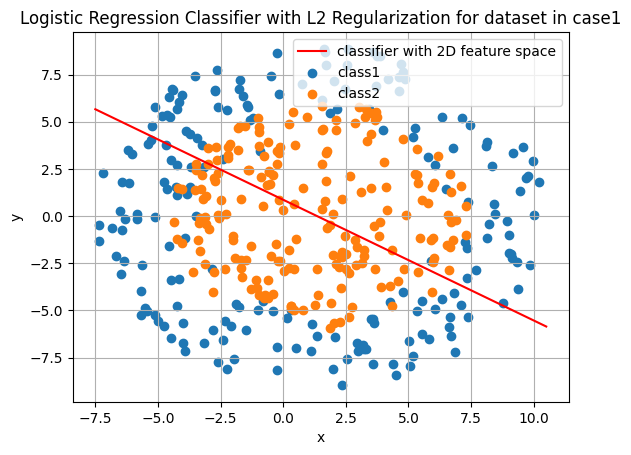

In [80]:
x1 = np.linspace(-7.5, 10.5, num=20)
x2 = (1/w1[1])*(-b1 - w1[0]*x1)
plt.title('Logistic Regression Classifier with L2 Regularization for dataset in case1')
plt.plot(x1, x2, label='classifier with 2D feature space', color='r')
plt.scatter(_1_class1_x, _1_class1_y, label='class1')
plt.scatter(_1_class2_x, _1_class2_y, label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [165]:
_2_classes_x = list(_2_class1_x) + _2_class2_x
_2_classes_y = list(_2_class1_y) + _2_class2_y
labels = [0]*num_of_points2 + [1]*num_of_points1
X = np.array(list(zip(_2_classes_x, _2_classes_y)))

raw_data = {'x1': _2_classes_x,
            'x2': _2_classes_y,
            'label': labels,
           }
df = pd.DataFrame(raw_data, columns=['x1', 'x2', 'label'])

mask = np.random.rand(len(df)) < 0.7

train_x1 = (df['x1'])[mask]
train_x2 = (df['x2'])[mask]
train_label = (df['label'])[mask]
test_x1 = (df['x1'])[~mask]
test_x2 = (df['x2'])[~mask]
test_label = (df['label'])[~mask]

print(df)

           x1        x2  label
0    2.530801 -0.553202      0
1   -0.157960 -0.163456      0
2    0.244795  0.520021      0
3    1.346619  1.290240      0
4    0.611060  1.411249      0
..        ...       ...    ...
295 -3.221948  2.810716      1
296 -2.081440  0.394801      1
297 -2.382363 -2.419619      1
298  4.225154  3.041578      1
299  0.069161 -3.806750      1

[300 rows x 3 columns]


In [166]:
w1 = np.zeros(2)
b1 = 0

w2 = np.zeros(35)
b2 = 0

etha = 0.0001
alpha = 0.0001

N = len(train_label)
epochs = 50

for i in range(0, epochs):
    log_loss_train1 = []
    log_loss_test1 = []
        
    for (x1, x2, label) in zip(train_x1, train_x2, train_label):
        
        grad_w1 = gradient_dw(np.array([x1, x2]), label, w1, b1, alpha, N)
        grad_b1 = gradient_db(np.array([x1, x2]), label, w1, b1)
        
        w1 = np.array(w1) + (etha*np.array(grad_w1))
        b1 = b1 + (etha * grad_b1)
        
    predict_train1 = []
    for (x1, x2, label) in zip(train_x1, train_x2, train_label):
        z = np.dot(w1, np.array([x1, x2]))+b1
        predict_train1.append(sigmoid(z))
        
    train_loss1 = logloss(train_label, predict_train1)
    
    predict_test1 = []
    for (x1, x2, label) in zip(test_x1, test_x2, test_label):
        z = np.dot(w1, np.array([x1, x2]))+b1
        predict_test1.append(sigmoid(z))
        
    test_loss1 = logloss(test_label, predict_test1)
    
    if log_loss_train1 and train_loss1 > log_loss_train1[-1]:
        break
        
    log_loss_train1.append(train_loss1)
    log_loss_test1.append(test_loss1)
    
# R2 -> R35
for i in range(0, epochs):
        
    log_loss_train2 = []
    log_loss_test2 = []
        
        
    for (x1, x2, label) in zip(train_x1, train_x2, train_label):
        
        X = []
        for i in range(1, 8):
            for j in range(0, i+1):
                X.append((x1**(i))*(x2**(i-j))/100)
        
        grad_w2 = gradient_dw(np.array(X), label, w2, b2, alpha, N)
        grad_b2 = gradient_db(np.array(X), label, w2, b2)
        
        w2 = np.array(w2) + (etha*np.array(grad_w2))
        b2 = b2 + (etha * grad_b2)
    
    predict_train2 = []
    for (x1, x2, label) in zip(train_x1, train_x2, train_label):
        X = []
        for i in range(1, 8):
            for j in range(0, i+1):
                X.append((x1**(i))*(x2**(i-j)))
                
        z = np.dot(w2, np.array(X))+b2
        predict_train2.append(sigmoid(z))
    
    train_loss2 = logloss(train_label, predict_train2)
    
    predict_test2 = []
    for (x1, x2, label) in zip(test_x1, test_x2, test_label):
        X = []
        for i in range(1, 8):
            for j in range(0, i+1):
                X.append((x1**(i))*(x2**(i-j)))
                
        z = np.dot(w2, np.array(X))+b2
        predict_test2.append(sigmoid(z))
       
    test_loss2 = logloss(test_label, predict_test2)
    
    if log_loss_train2 and train_loss2 > log_loss_train2[-1]:
        break
        
    log_loss_train2.append(train_loss2)
    log_loss_test2.append(test_loss2)
    

C:\Users\fatasystem\AppData\Local\Temp\ipykernel_3092\814811169.py:6: RuntimeWarning: divide by zero encountered in log10
  log_loss = -1 * np.mean(y_actual*np.log10(y_pred) + (1-y_actual)*np.log10(1-y_pred))
C:\Users\fatasystem\AppData\Local\Temp\ipykernel_3092\814811169.py:6: RuntimeWarning: invalid value encountered in multiply
  log_loss = -1 * np.mean(y_actual*np.log10(y_pred) + (1-y_actual)*np.log10(1-y_pred))


In [167]:
w2

array([ 2.31521984e-06, -7.19422062e-03,  7.61607119e-02, -3.04444224e-03,
        8.53540904e-03,  4.76862898e-02, -1.77215894e-01,  1.11085244e-03,
       -4.25625813e-02,  7.50484342e+00, -5.46006580e-02,  6.30911520e-01,
       -1.75199232e-02,  1.33868141e-01,  5.94025266e+00, -3.36421314e+00,
        2.34522574e-01, -1.02023320e+00, -1.03201381e-02, -2.97980699e-01,
        1.45567584e+03,  1.46040760e+00,  9.38335890e+01,  1.02649638e+00,
        8.09061597e+00, -9.14371681e-02,  2.49017941e+00,  6.36266096e+02,
        3.62789980e+03,  5.09835054e+01,  1.53121280e+02,  7.83986807e-01,
        1.23165872e+00, -1.29897518e-01,  4.26370849e-01])

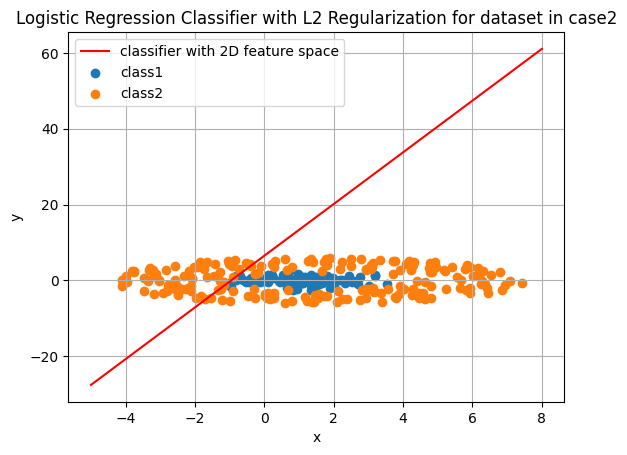

In [169]:
x1 = np.linspace(-5, 8, num=20)
x2 = (1/w1[1])*(-b1 - w1[0]*x1)
plt.title('Logistic Regression Classifier with L2 Regularization for dataset in case2')
plt.plot(x1, x2, label='classifier with 2D feature space', color='r')
plt.scatter(_2_class1_x, _2_class1_y, label='class1')
plt.scatter(_2_class2_x, _2_class2_y, label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()